In [11]:
#pip install numba_progress

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from tracking import PatchMatchTracking
from eval import make_gif, mask_on_image, dice_assessment

In [2]:
root = '/home/gabriel/Téléchargements/sequences-train/sequences-train/'
name = 'swan' # name of the sequence : bag, bear, book, camel, rhino, swan
im_begin, im_end = 1, 26 # reference image (1) and last image (varies depending on the sequence)

In [3]:
imgs = []
masks = []
for k in range(1, 11):
    imgs.append(io.imread(root + name + '-%0*d.bmp'%(3,k)))
    masks.append(io.imread(root + name + '-%0*d.png'%(3,k)))

In [4]:
#Sequential integration
tracker = PatchMatchTracking(p_size=7, pm_iter=13, n_iter=5, threshold=5, monte_carlo=True, smooth=True, sm_kernel=5)
esti_mask = tracker.track_with_step(imgs, masks[0])

  0%|          | 0/9 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8


In [5]:
print(len(esti_mask))

10


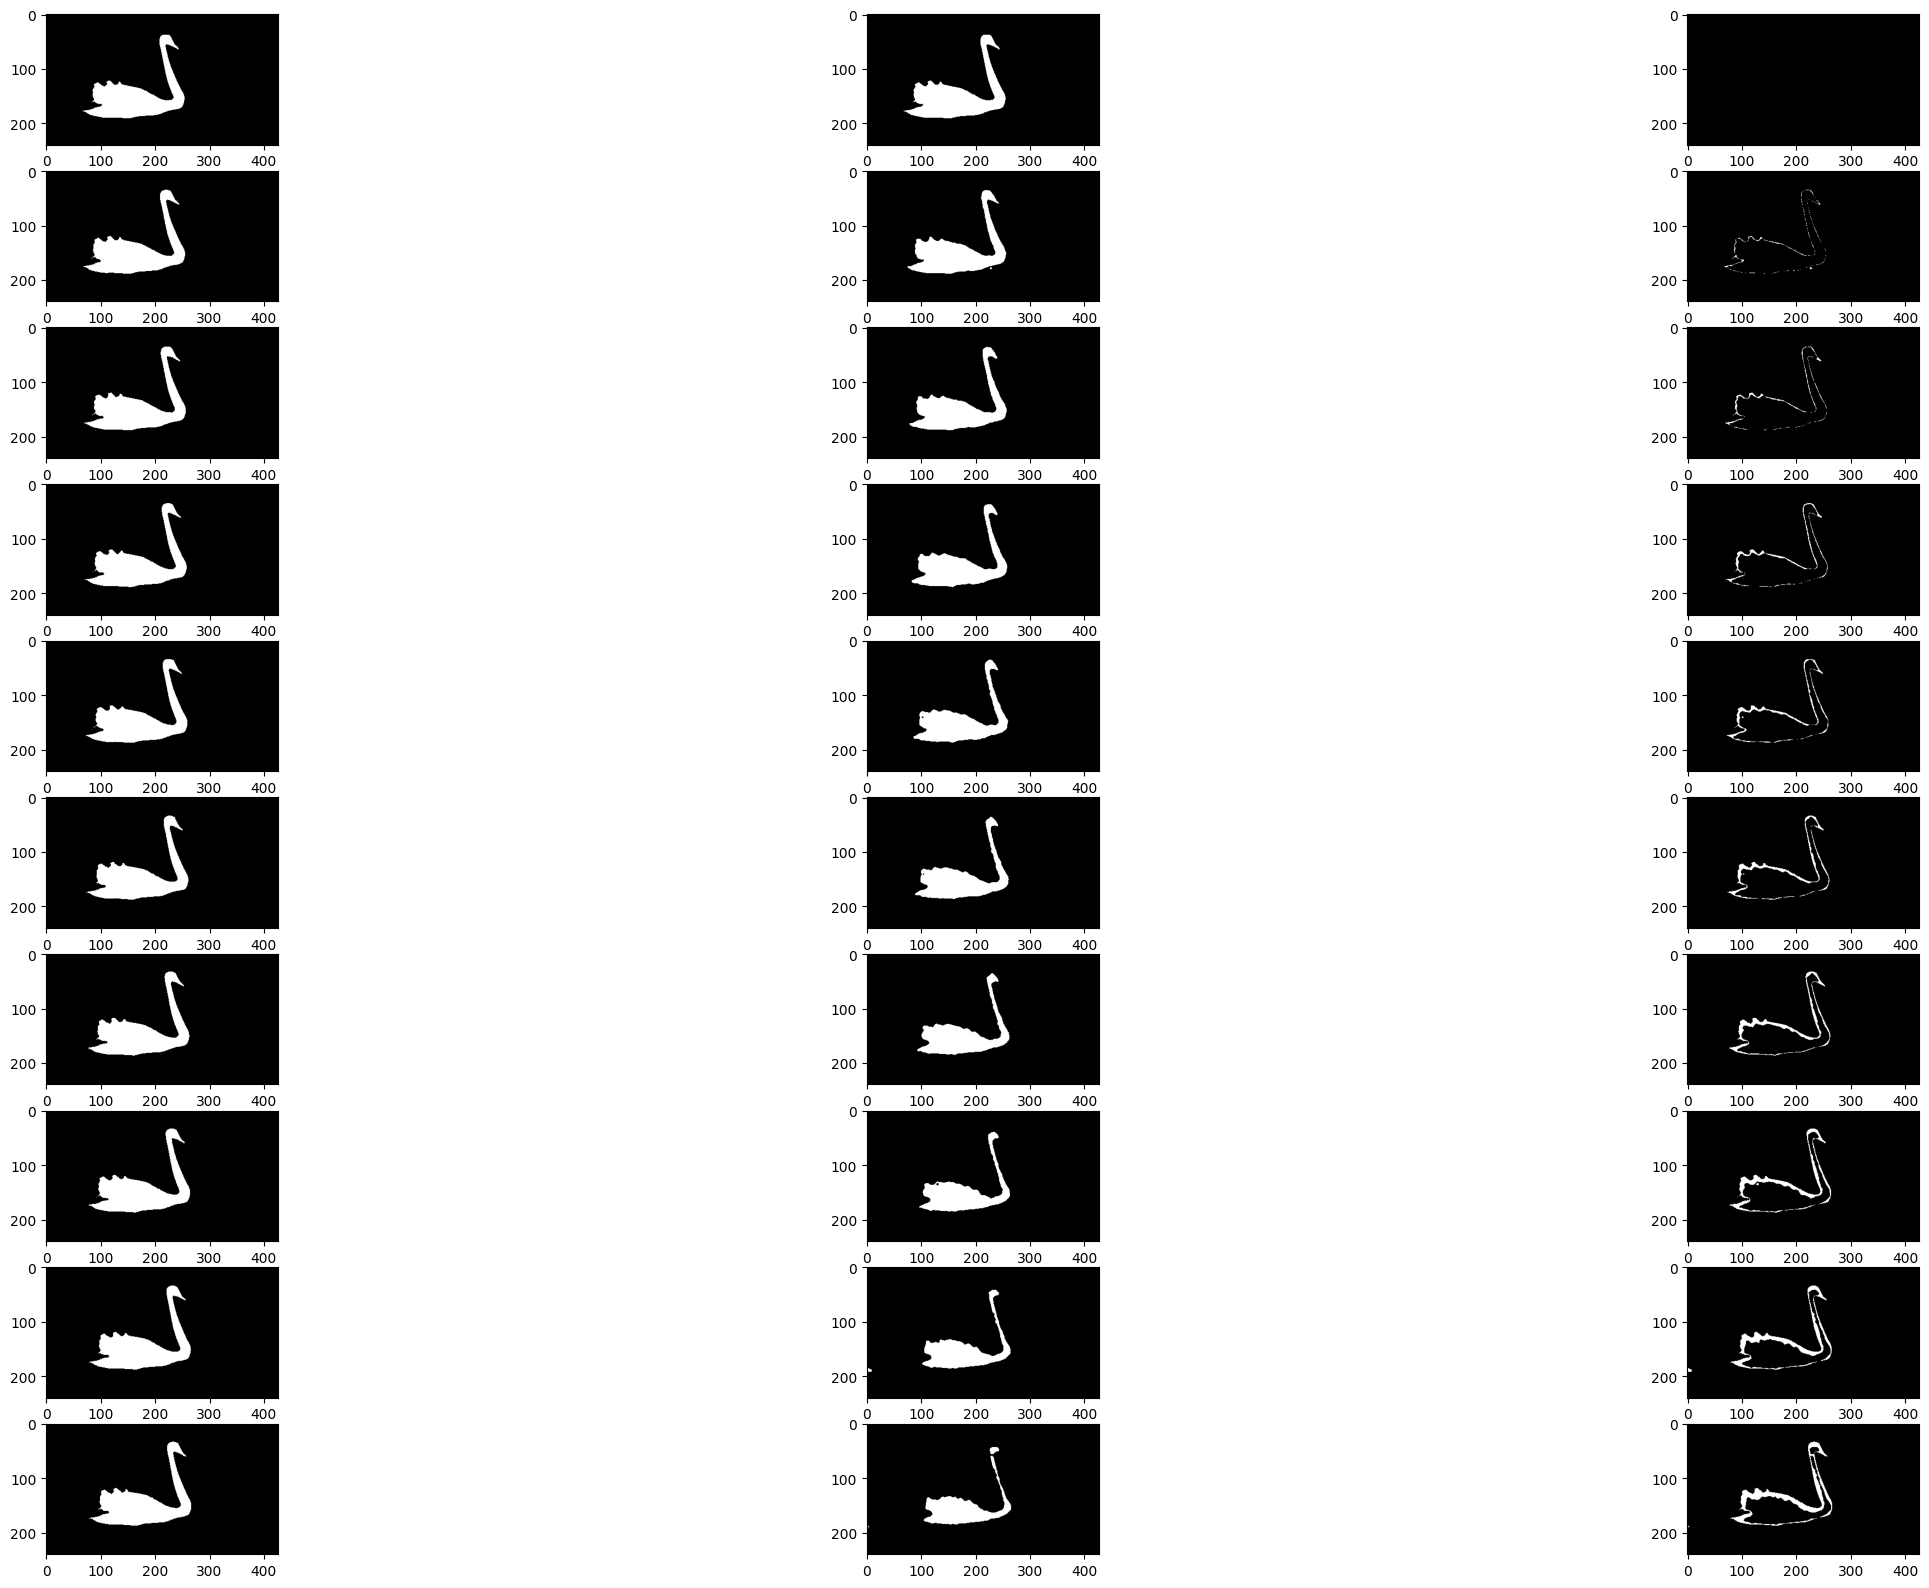

In [6]:
fig, axs = plt.subplots(len(esti_mask), 3, figsize=(30, 20))

for i in range(len(esti_mask)):
    axs[i,0].imshow(masks[i], cmap="gray")
    axs[i,1].imshow(esti_mask[i], cmap="gray")
    axs[i,2].imshow(np.abs(masks[i]-esti_mask[i]), cmap="gray")
plt.show()

In [7]:
list_dice = []
for i in range(len(esti_mask)):
    list_dice.append(dice_assessment(masks[i], esti_mask[i], label=255))
print(np.mean(list_dice))

88.83385364280343


In [ ]:
#Hybrid integration
    
step = 3
tracker1 = PatchMatchTracking(p_size=7, pm_iter=13, n_iter=5, threshold=5, monte_carlo=True, smooth=True, sm_kernel=5)
esti_mask1 = tracker1.track_with_step(imgs, masks[0],step)

  0%|          | 0/9 [00:00<?, ?it/s]

0
1
2
3
4
5
6
7
8


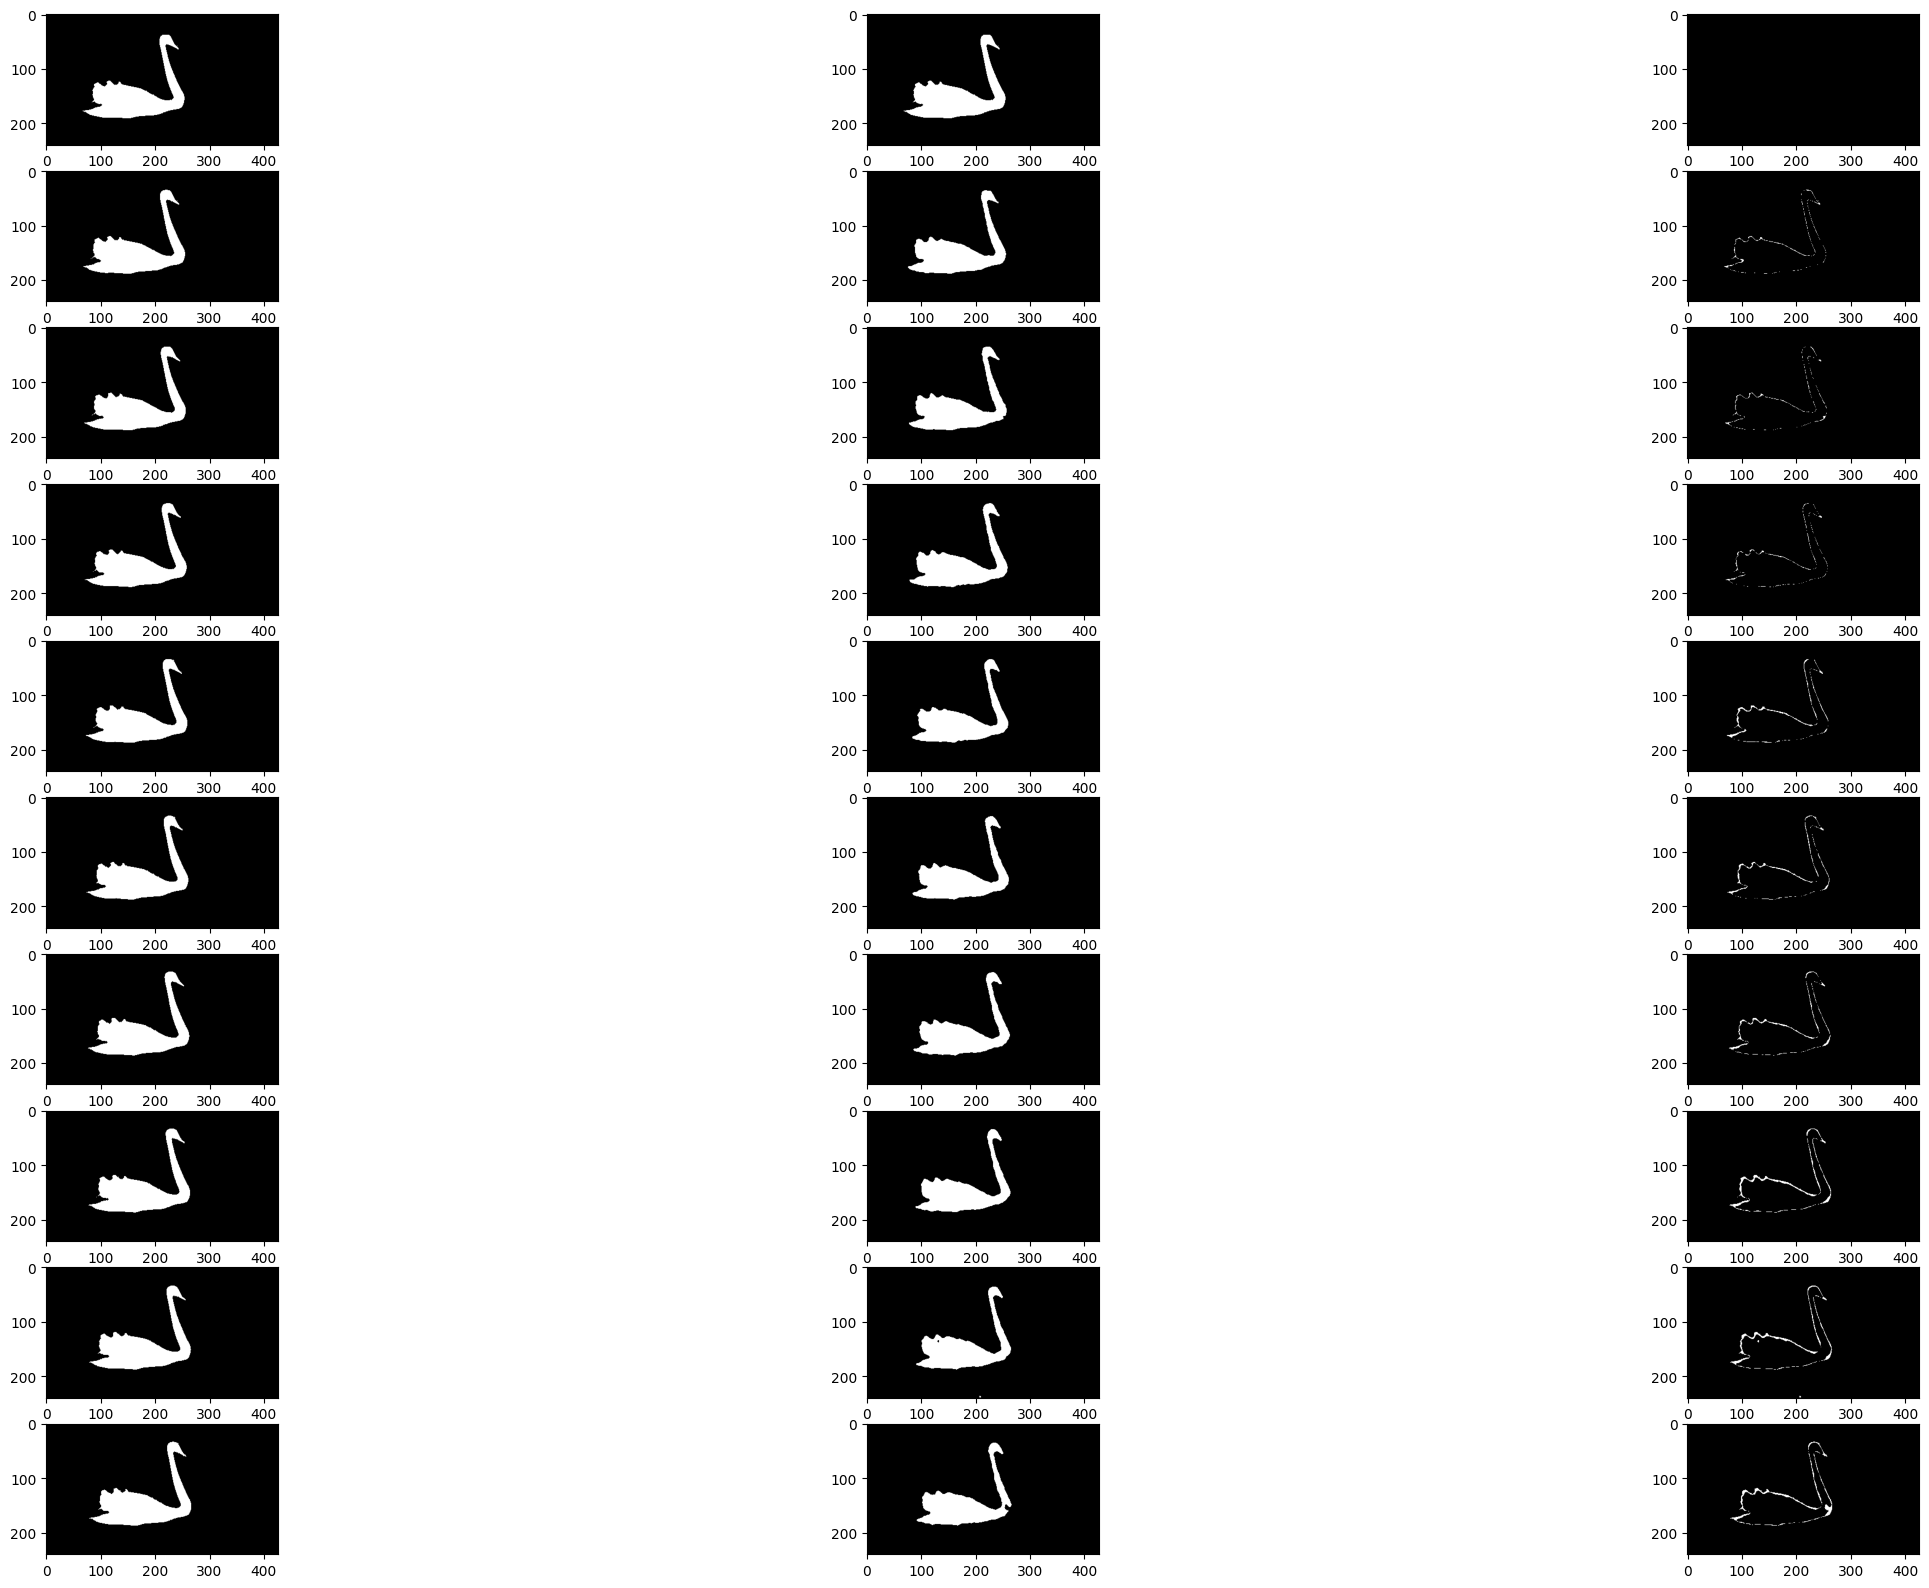

In [ ]:
fig, axs = plt.subplots(len(esti_mask1), 3, figsize=(30, 20))

for i in range(len(esti_mask1)):
    axs[i,0].imshow(masks[i], cmap="gray")
    axs[i,1].imshow(esti_mask1[i], cmap="gray")
    axs[i,2].imshow(np.abs(masks[i]-esti_mask1[i]), cmap="gray")
plt.show()

In [15]:
list_dice1 = []
for i in range(len(esti_mask1)):
    list_dice1.append(dice_assessment(masks[i], esti_mask1[i], label=255))
print(np.mean(list_dice1))

95.59850019492252
